In [6]:
%load_ext autoreload
%autoreload 2
import datasets
import llminference as L
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# LAMBADA

Notebook with basic information regarding the LAMBADA dataset.

In [7]:
lambada = datasets.load_dataset("EleutherAI/lambada_openai")

No config specified, defaulting to: lambada_openai/default
Found cached dataset lambada_openai (/nethome/lukar/.cache/huggingface/datasets/EleutherAI___lambada_openai/default/1.0.0/57baddecfa09d1790541ef07274c5666abfbe9d2ccd0cd46013cd557b0343095)


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
adapter = L.Adapter.from_pretrained("EleutherAI/pythia-70m")

In [11]:
ds = lambada["test"]
texts = ds["text"]

In [12]:
context_lens = [adapter.tokenizer(text, return_tensors="pt").input_ids.shape[1] for text in texts]

In [17]:
print(f"Average context length: {np.mean(context_lens):.3} ± {np.std(context_lens):.3}")

Average context length: 81.2 ± 12.3


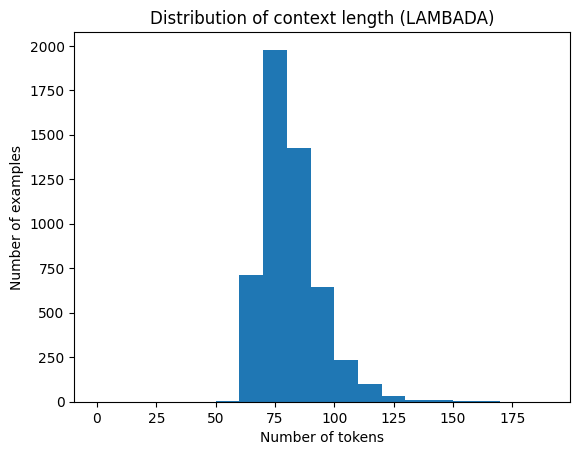

In [20]:
plt.hist(context_lens, bins = np.arange(20) * 10)
plt.title("Distribution of context length (LAMBADA)")
plt.xlabel("Number of tokens")
plt.ylabel("Number of examples")
plt.show()